## 1) Utilize o dataset Mall_Costumers que está disponível no formato .csv, seu objetivo será criar um modelo de agrupamento para descobrir grupos de compras, para que se possa fazer um estudo de perfil de gastos. Você deve utilizar as seguintes variáveis: Age (idade), Spending Score (número entre 1 - 100 que representa o quanto uma pessoa gasta no shopping), utilize o método que preferir para definir o número de grupos. Demonstre todos os passos que criou para chegar na resposta. Apresente o modelo e suas métricas de avaliação.

In [19]:
import pandas as pd

data = pd.read_csv("Mall_Customers.csv", sep=",")

Total de dados: 200



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

Total de dados: 200



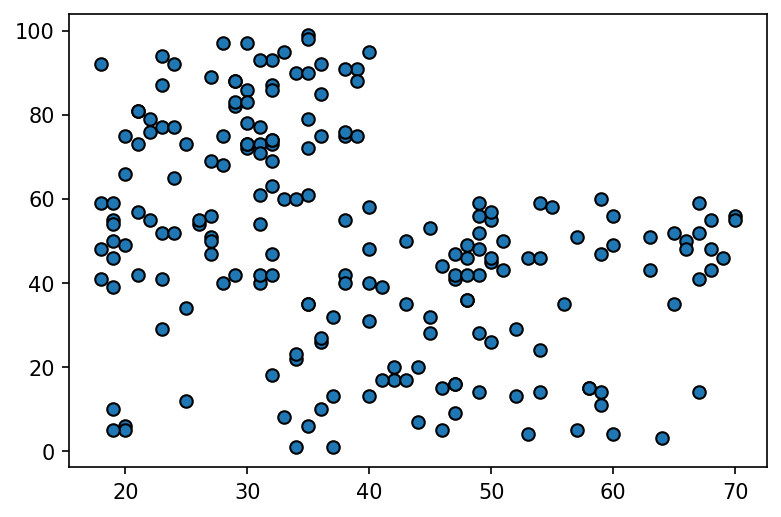

In [20]:
import matplotlib.pyplot as plt


print(f"Total de dados: {len(data)}\n")

display(data.head())
print("\n")
display(data.isna().any())
data = data.dropna()

print(f"Total de dados: {len(data)}\n")
plt.rcParams['figure.dpi'] = 150
plt.scatter(data["Age"], data["Spending Score (1-100)"], marker="o", edgecolor="black")
plt.show()

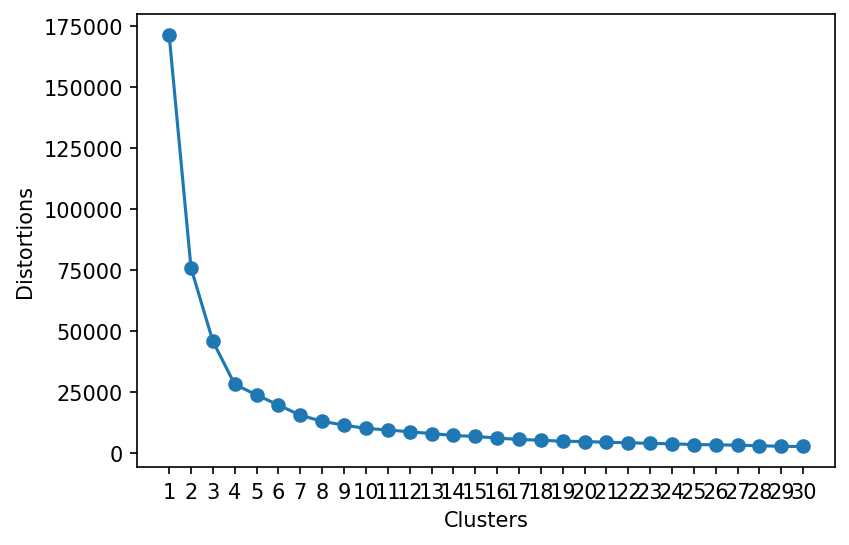

In [22]:
from sklearn.cluster import KMeans
import numpy as np

x = [[i["Age"], i["Spending Score (1-100)"]] for _, i in data.iterrows()]
x = np.array(x)

distortions = []
for i in range(1, 31):
    km = KMeans(n_clusters=i)
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1, 31), distortions, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Distortions")
plt.xticks(range(1, 31))
plt.show()

In [32]:
modelo = KMeans(n_clusters=72)
modelo.fit(x)

KMeans(n_clusters=72)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

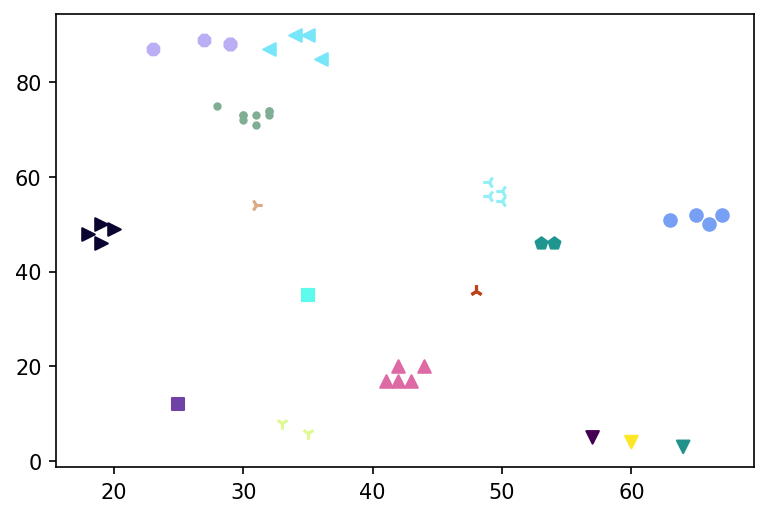

In [33]:
import numpy as np
from matplotlib.lines import Line2D

y_km = modelo.predict(x)
markers = list(Line2D.markers.keys())

for i in range(14):
    plt.scatter(x[y_km == i, 0], x[y_km == i, 1], c=np.random.rand(3,), marker=markers[i], label="grupo 1")

plt.show()

In [34]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score
print('Calinski-Harabasz score: %.2f' % calinski_harabasz_score(x, modelo.labels_))
print('Silhouette score: %.2f' % silhouette_score(x, modelo.labels_))

Calinski-Harabasz score: 501.29
Silhouette score: 0.42


## 2) Construa um modelo de regressão linear simples que relacione as variáveis “sqft_living” e “price” do dataset “House Sales in King County, USA” (kc_house_date) que está disponível para download no Teams, em um formato .csv, este dataset possui dados sobre preços de vendas imobiliárias nos Estados Unidos. Para a construção do modelo realize uma análise exploratória sobre os dados e divida o dataset para treino e avaliação com uma proporção que julgue satisfatória. Apresente o modelo e suas métricas de avaliação, para uma resposta completa utilize gráficos que demonstrem tais resultados. Para o desenvolvimento da questão utilize os modelos disponibilizados pelo framework sckit-learn, tal como realizado em aula. Seja criativo durante o desenvolvimento da sua solução!

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [35]:
import pandas as pd

data = pd.read_csv("kc_house_data.csv", sep=",")

Total de dados: 21613



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Total de dados: 21613



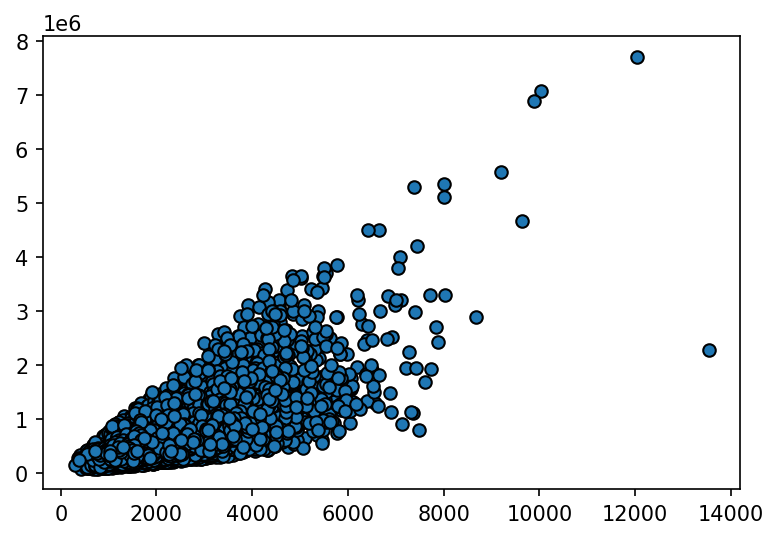

In [37]:
import matplotlib.pyplot as plt


print(f"Total de dados: {len(data)}\n")

display(data.head())
print("\n")
display(data.isna().any())
data = data.dropna()

print(f"Total de dados: {len(data)}\n")
plt.rcParams['figure.dpi'] = 150
plt.scatter(data["sqft_living"], data["price"], marker="o", edgecolor="black")
plt.show()

In [44]:
dataset = pd.DataFrame(data, columns = ["sqft_living","price"])
print(dataset.head(5))

   sqft_living     price
0         1180  221900.0
1         2570  538000.0
2          770  180000.0
3         1960  604000.0
4         1680  510000.0


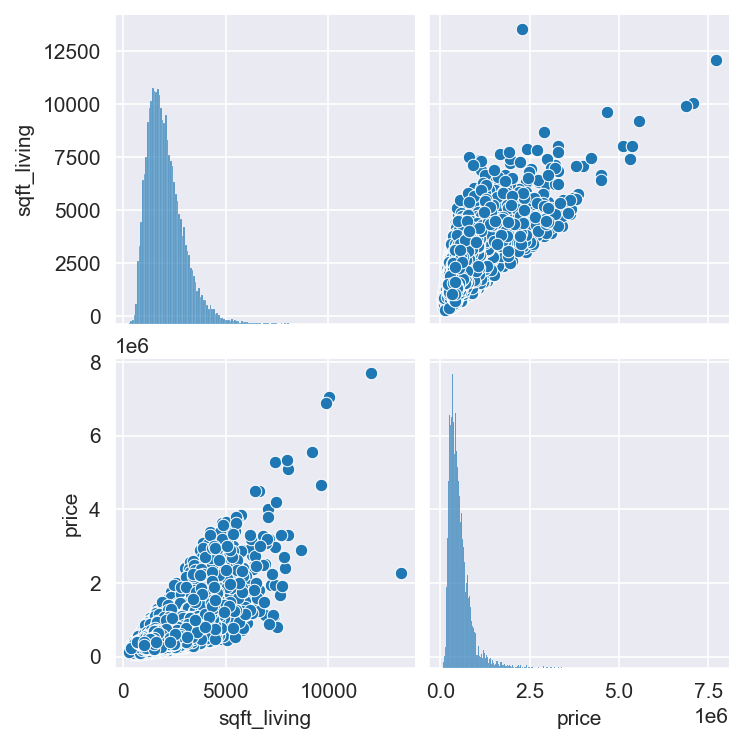

In [68]:
sns.pairplot(dataset)

In [51]:
# Divisão habitual dos conjuntos entre 'features/atributos' e 'targets/saidas'
array = dataset.values
print(type(array))
x = array[:,0:1]
y = array[:,1]

<class 'numpy.ndarray'>


In [52]:
# divisão automatica dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [53]:
print("Formato de X_train: ", X_train.shape)
print("Formato de X_test: ", X_test.shape)
print("Formato de Y_train: ", Y_train.shape)
print("Formato de Y_test: ", Y_test.shape)

Formato de X_train:  (15129, 1)
Formato de X_test:  (6484, 1)
Formato de Y_train:  (15129,)
Formato de Y_test:  (6484,)


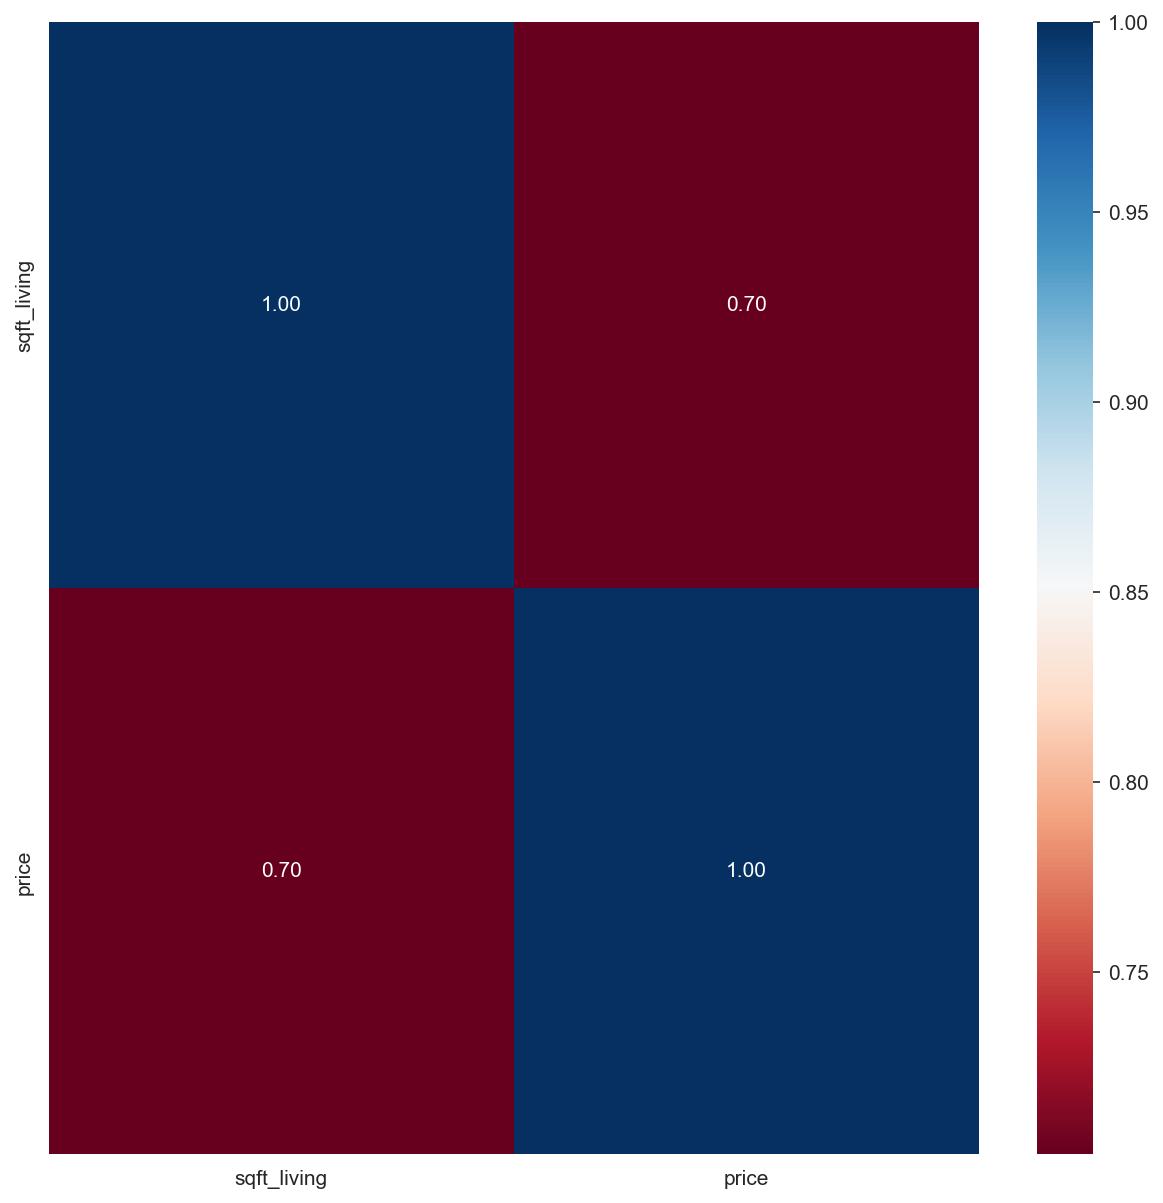

In [54]:
# Obtendo estatística de correlação
corr = dataset.corr()

# Gerando gráfico de 'heatmap' e plotando
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

# Definindo labels do gráfico
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns, ha="center")
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns, va="center")

#show plt
plt.show()

In [55]:
# Importação de bibliotecas de funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [56]:
# Loading do modelo
from sklearn.linear_model import LinearRegression

In [57]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression()

In [58]:
# Avaliação de desempenho de acurácia a partir do cross-validation
cv_1 = cross_val_score(estimator=model_1, X=X_train, y=Y_train, cv=10)

In [59]:
# Calculo de desempenho utilizando métrica r2 (distancia quadratica de um valor até o valor real)
y_pred_train_1 = model_1.predict(X_train)
r2_train_1 = r2_score(Y_train, y_pred_train_1)

y_pred_test_1 = model_1.predict(X_test)
r2_test_1 = r2_score(Y_test, y_pred_test_1)

In [60]:
# Calculo de desempenho utilizando RMSE

rmse_1 = (np.sqrt(mean_squared_error(Y_test, y_pred_test_1)))

In [61]:
# Exibição dos resultados
print("Modelo Linear Regression")
print("CV: ", cv_1.mean())
print("R2 train: ", r2_train_1)
print("R2 test: ", r2_test_1)
print("RMSE: ", rmse_1)

Modelo Linear Regression
CV:  0.4844066257509961
R2 train:  0.4882956342362882
R2 test:  0.5030077634261775
RMSE:  260370.21432253014
